## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from prophet import Prophet

## Import the Dataset

In [2]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
df.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df['FullDate'] = pd.to_datetime(df.FullDate)

In [5]:
df.set_index('FullDate', inplace=True)

In [6]:
df.shape

(92016, 4)

In [7]:
fc=df

In [8]:
dt_hourly = fc.resample('H').mean()

dt_daily = fc.resample('D').mean()

dt_weekly = fc.resample('W').mean()

dt_monthly = fc.resample('M').mean()

print(dt_hourly .shape)
print(dt_daily.shape)
print(dt_weekly.shape)
print(dt_monthly.shape)

(92016, 4)
(3834, 4)
(548, 4)
(126, 4)


## Plotting Graph

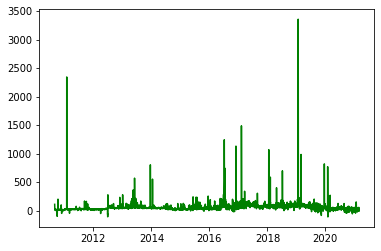

In [9]:
daily_rate = (dt_daily['ElecPrice'])
plt.plot(daily_rate , c='green');

## Resampling the Data

In [10]:
daily_fc = fc.resample('D')
new_fc = daily_fc.sum()
new_fc = new_fc.reset_index() 

In [11]:
new_fc.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [12]:
adf = adfuller(new_fc[ 'SysLoad'])
round(adf[1],6)


0.004254

In [13]:
adf_gas = adfuller(new_fc[ 'GasPrice'])
round(adf_gas[1],6)

0.045027

In [14]:
adf_elec = adfuller(new_fc[ 'ElecPrice'])
for i in [adf_gas[4], adf_elec[4]]:
    if i ==0:
            print('Critical Values for GasPrice')
            continue
    else:
        print('Critical Values for ElecPrice')
    
    for k, v in i.items():
        print( f' {k} : {round(v,4)} ' )

Critical Values for ElecPrice
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 
Critical Values for ElecPrice
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 


In [15]:
new_df = new_fc[['FullDate','ElecPrice']]
new_df =new_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
new_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


## Dataset splitting

In [16]:
fc_train = new_df.iloc[:2757]
fc_test  = new_df.iloc[2757:]

In [17]:
model = Prophet(daily_seasonality=True)
model.fit(fc_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi78x3_uw/46eu1u00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi78x3_uw/ddcp1eav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82144', 'data', 'file=/tmp/tmpi78x3_uw/46eu1u00.json', 'init=/tmp/tmpi78x3_uw/ddcp1eav.json', 'output', 'file=/tmp/tmpi78x3_uw/prophet_model5p6aopb3/prophet_model-20230131174847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
forecast = model.predict(fc_test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,4196.104586,135.414930,4879.934495,4196.104586,4196.104586,-1671.364631,-1671.364631,-1671.364631,-1516.001192,...,9.735829,9.735829,9.735829,-165.099268,-165.099268,-165.099268,0.0,0.0,0.0,2524.739954
1,2018-03-21,4196.883440,267.756735,5050.294020,4196.883440,4196.883440,-1518.891289,-1518.891289,-1518.891289,-1516.001192,...,159.352406,159.352406,159.352406,-162.242503,-162.242503,-162.242503,0.0,0.0,0.0,2677.992151
2,2018-03-22,4197.662295,285.304784,5224.411053,4197.662295,4197.662295,-1420.709183,-1420.709183,-1420.709183,-1516.001192,...,257.112222,257.112222,257.112222,-161.820212,-161.820212,-161.820212,0.0,0.0,0.0,2776.953112
3,2018-03-23,4198.441149,171.238226,4981.659769,4198.441149,4198.441149,-1629.393114,-1629.393114,-1629.393114,-1516.001192,...,50.274247,50.274247,50.274247,-163.666168,-163.666168,-163.666168,0.0,0.0,0.0,2569.048036
4,2018-03-24,4199.220004,-196.046210,4549.079421,4199.220004,4199.220004,-1954.988609,-1954.988609,-1954.988609,-1516.001192,...,-271.449668,-271.449668,-271.449668,-167.537749,-167.537749,-167.537749,0.0,0.0,0.0,2244.231395


In [19]:
# Calculating the MAPE
true = fc_test['y']
pred = forecast['yhat']

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return round(np.mean(np.abs((true - pred) / true)) * 100,2)

MAPE(true, pred)

541.48

In [20]:
mse = mean_squared_error(fc_test.y,forecast.yhat)
round(np.sqrt(mse),2)

3201.59

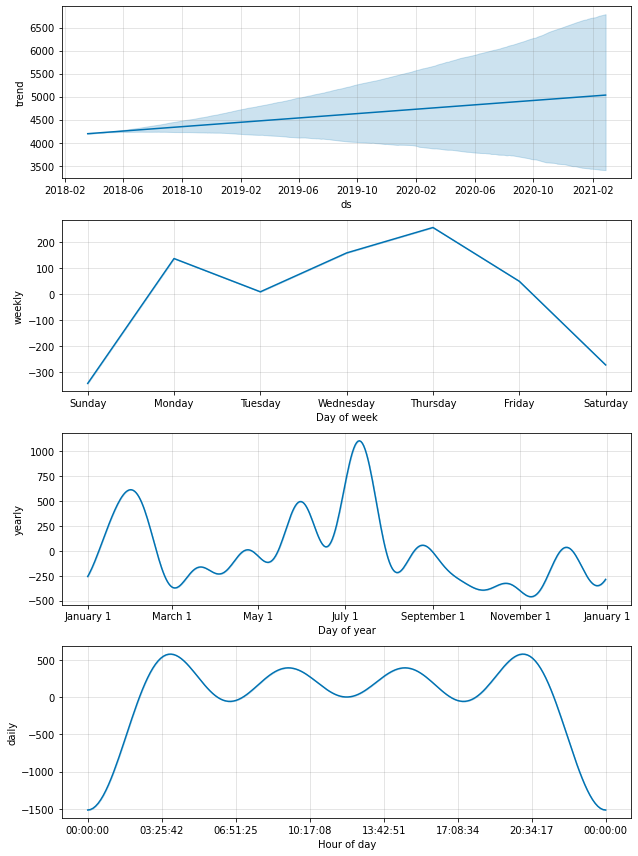

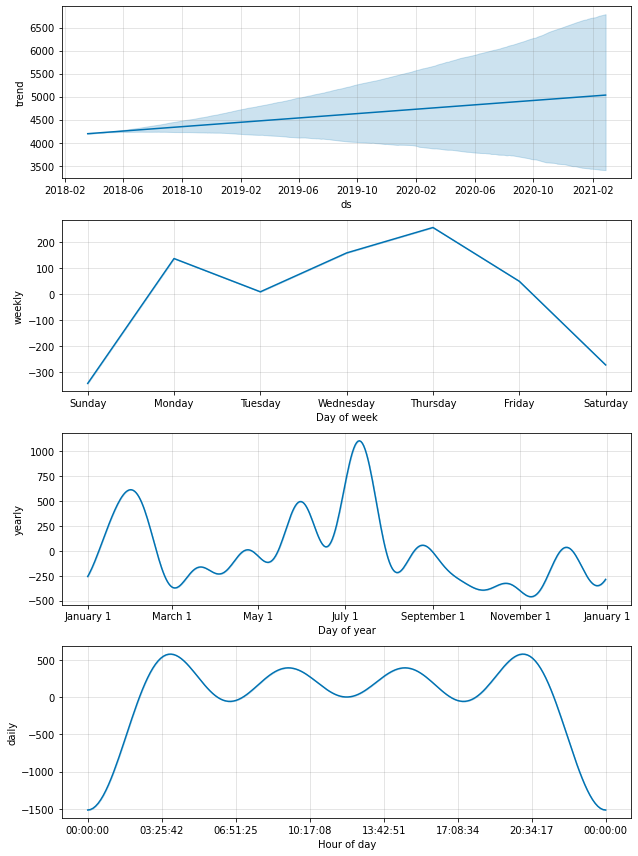

In [21]:
model.plot_components(forecast)

## Multivariate Forecasting

In [23]:
new_df = new_fc[['FullDate','ElecPrice']]
new_df =new_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
new_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [24]:
new_df["add1"] = new_fc['SysLoad']
new_df["add2"] = new_fc['Tmax']
new_df["add3"] = new_fc['GasPrice']

In [25]:
new_df.head(3)

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.38,379.2,88.56
1,2010-09-02,570.810,38898.99,369.6,88.56
2,2010-09-03,504.975,41665.76,439.2,106.80


In [27]:
fc_train = new_df.iloc[:2757]
fc_test  = new_df.iloc[2757:]

In [28]:
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [29]:
model2.fit(fc_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi78x3_uw/q5bxpg82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi78x3_uw/tnumx6po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25381', 'data', 'file=/tmp/tmpi78x3_uw/q5bxpg82.json', 'init=/tmp/tmpi78x3_uw/tnumx6po.json', 'output', 'file=/tmp/tmpi78x3_uw/prophet_modelh34lapzd/prophet_model-20230131175450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
forecast2 = model2.predict(fc_test)

In [31]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1867.204510,-127.415568,4116.514611,1867.204510,1867.204510,-856.286567,-856.286567,-856.286567,0.236280,...,-84.476147,-84.476147,-84.476147,-39.061079,-39.061079,-39.061079,0.0,0.0,0.0,1986.764063
1,2018-03-21,1867.893046,-325.405771,4248.763419,1867.893046,1867.893046,-1026.281456,-1026.281456,-1026.281456,0.233477,...,42.524741,42.524741,42.524741,-29.773204,-29.773204,-29.773204,0.0,0.0,0.0,1978.166932
2,2018-03-22,1868.581583,742.245186,5188.873783,1868.581583,1868.581583,-214.935967,-214.935967,-214.935967,0.219893,...,145.612882,145.612882,145.612882,-24.740713,-24.740713,-24.740713,0.0,0.0,0.0,2898.308005
3,2018-03-23,1869.270119,270.448117,4682.785552,1869.270119,1869.270119,-274.867855,-274.867855,-274.867855,0.211915,...,-44.306399,-44.306399,-44.306399,-23.822245,-23.822245,-23.822245,0.0,0.0,0.0,2582.549267
4,2018-03-24,1869.958655,-827.261326,3590.119553,1869.958655,1869.958655,-1076.321337,-1076.321337,-1076.321337,0.209975,...,-117.531858,-117.531858,-117.531858,-26.767060,-26.767060,-26.767060,0.0,0.0,0.0,1435.761426


In [33]:
true = fc_test['y']
pred = forecast2['yhat']

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return round(np.mean(np.abs((true - pred) / true)) * 100,2)

MAPE(true, pred)

231.91

In [34]:
mse = mean_squared_error(fc_test.y,forecast2.yhat)
round(np.sqrt(mse),2)

2707.61

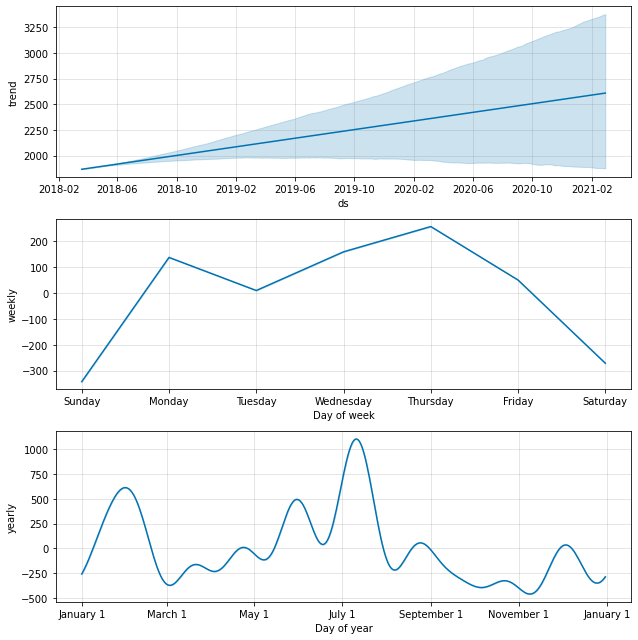

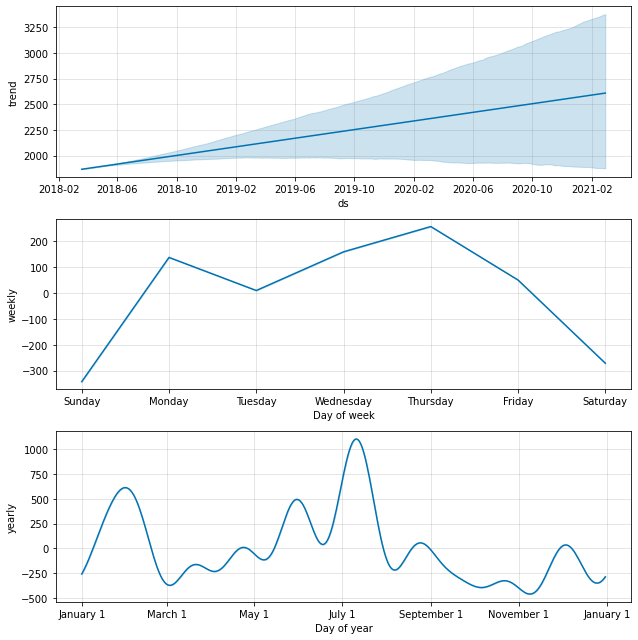

In [35]:
model.plot_components(forecast2)


In [37]:
new_df.head(3)


,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.38,379.2,88.56
1,2010-09-02,570.810,38898.99,369.6,88.56
2,2010-09-03,504.975,41665.76,439.2,106.80


In [39]:
fc_train = new_df.iloc[:2757]
fc_test  = new_df.iloc[2757:]

In [40]:
model3 = Prophet(daily_seasonality=True)
model3.fit(fc_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi78x3_uw/2iw_7xmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi78x3_uw/4f0dwwz3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38671', 'data', 'file=/tmp/tmpi78x3_uw/2iw_7xmz.json', 'init=/tmp/tmpi78x3_uw/4f0dwwz3.json', 'output', 'file=/tmp/tmpi78x3_uw/prophet_modelkiynqgmh/prophet_model-20230131175856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:58:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
forecast3 = model3.predict(fc_test)

In [44]:
true = fc_test['y']
pred = forecast3['yhat']

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return round(np.mean(np.abs((true - pred) / true)) * 100,2)

MAPE(true, pred)

541.48